Downloading Data from PhysioNet CAP Sleep Database

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

In [5]:
import neurokit2 as nk

In [7]:
import os
import csv

In [119]:
## FOR LABELED DATA:

root_directory_path = "F:\\Research\\capslpdb"

# File path for the pickle file
pickle_file_path = "C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s.pk1.gz"
# pickle_file_path_train = "C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s_train.pk1.gz"
# pickle_file_path_test = "C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s_test.pk1.gz"

master_df = pd.DataFrame({})
# train_df = pd.DataFrame({})
# test_df = pd.DataFrame({})

n_count = 0
rbd_count = 0
# Iterate over files in directory
for name in os.listdir(root_directory_path):
    # if count > 0:
    #     break

    if name.endswith(".edf") == False:
        continue
    
    if name.startswith("rbd"):
        label = -1
    elif name.startswith("n") and name.startswith("nfle") == False and name.startswith("narco") == False:
        label = 1
    else:
        continue
    
    # Open file
    file_path = os.path.join(root_directory_path, name);
    try:
        signals, signal_headers, header = highlevel.read_edf(file_path, ch_names="ECG1-ECG2")
        if (len(signals) == 0):
            signals, signal_headers, header = highlevel.read_edf(file_path, ch_names="ECG")
    except OSError as err:
        print("OS error: " + file_path)

    # Calculate the factor by which to downsample
    try:
        factor = (int) (signal_headers[0]['sample_frequency'] // 8.0)
    except IndexError as err:
        print ("Index error: " + file_path)
    else:
        downsampled = signals[0].reshape(-1, factor).mean(axis=1)
        print(len(downsampled))
        for i in range(10000, 20000, 240):
            downsampled_slice = downsampled[i:i+240] ## 240 samples, 30 s
            cleaned = nk.ecg_clean(downsampled_slice, sampling_rate=8.0, method="neurokit")
            cleaned_with_label = np.insert(cleaned, 0, label)
            df = pd.DataFrame({name : cleaned_with_label}).T

            # ## 80/20 Train/Test split; using 20 rbd patients, 10 normal patients
            # if label == -1:
            #     if rbd_count < 16:
            #         train_df = pd.concat([train_df, df])
            #     elif rbd_count < 20:
            #         test_df = pd.concat([test_df, df])
            # else:
            #     if n_count < 8:
            #         train_df = pd.concat([train_df, df])
            #     elif n_count < 10:
            #         test_df = pd.concat([test_df, df])
            master_df = pd.concat([master_df, df])

        if label == -1:
            rbd_count += 1
        else:
            n_count += 1

    print ("Done with " + name)
    # count += 1

# print(len(train_df))
# print(len(test_df))
# train_df.to_pickle(pickle_file_path_train)
# test_df.to_pickle(pickle_file_path_test)
print(len(master_df))
master_df.to_pickle(pickle_file_path, compression="gzip")

276960
Done with n1.edf
235200
Done with n10.edf
252960
Done with n11.edf
OS error: F:\Research\capslpdb\n12.edf
252960
Done with n12.edf
OS error: F:\Research\capslpdb\n13.edf
252960
Done with n13.edf
OS error: F:\Research\capslpdb\n14.edf
252960
Done with n14.edf
will be ignored.
will be ignored.
Index error: F:\Research\capslpdb\n15.edf
Done with n15.edf
will be ignored.
will be ignored.
Index error: F:\Research\capslpdb\n16.edf
Done with n16.edf


C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source file (contains ['EOG-L', 'EOG-R', 'CHIN1', 'CHIN2', 'F3A2', 'F4A1', 'C3A2', 'C4A1', 'O1A2', 'O2A1', 'EKG'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG is not in source file (contains ['EOG-L', 'EOG-R', 'CHIN1', 'CHIN2', 'F3A2', 'F4A1', 'C3A2', 'C4A1', 'O1A2', 'O2A1', 'EKG'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source file (contains ['FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'C4-A1'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG is not in source file (contains ['FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'C4-A1'])
  warnings.warn('{} is not in source file (c

352800
Done with n2.edf
264488
Done with n3.edf
will be ignored.
will be ignored.
Index error: F:\Research\capslpdb\n4.edf
Done with n4.edf


C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source file (contains ['EOG DX', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'C4-A1', 'MILO', 'EOG SIN', 'TIB DX', 'TIB SIN', 'CANNULA', 'TORACICO', 'EKG', 'DELTOIDE', 'HEART RATE VARIA', 'FLATTENING', 'FLOW'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG is not in source file (contains ['EOG DX', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'C4-A1', 'MILO', 'EOG SIN', 'TIB DX', 'TIB SIN', 'CANNULA', 'TORACICO', 'EKG', 'DELTOIDE', 'HEART RATE VARIA', 'FLATTENING', 'FLOW'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source file (contains ['LOC-A1', 'ROC-A2', 'EMG-EMG', 'C3-A2', 'O2-A1', 'ECG', 'TAG', 'THE'])
  warnings.warn('{} is not in source file (contains {})'\


251528
Done with n5.edf
will be ignored.
253000
Done with n6.edf
will be ignored.


C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source file (contains ['LOC-A1', 'ROC-A2', 'EMG-EMG', 'C3-A2', 'O2-A1', 'ECG', 'TAG', 'THE'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source file (contains ['C3-A2', 'C4-P4', 'EKG', 'EOG-L', 'EOG-R', 'F4-C4', 'FP2-F4', 'P4-O2', 'TIB DX', 'TIB SX', 'ABDOMEN', 'FLOW', 'MILO', 'THORAX'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG is not in source file (contains ['C3-A2', 'C4-P4', 'EKG', 'EOG-L', 'EOG-R', 'F4-C4', 'FP2-F4', 'P4-O2', 'TIB DX', 'TIB SX', 'ABDOMEN', 'FLOW', 'MILO', 'THORAX'])
  warnings.warn('{} is not in source file (contains {})'\
C:\Users\Gang Ren\anaconda3\Lib\site-packages\pyedflib\highlevel.py:368: UserWarning: ECG1-ECG2 is not in source fil

236320
Done with n7.edf
will be ignored.
will be ignored.
Index error: F:\Research\capslpdb\n8.edf
Done with n8.edf
will be ignored.
255528
Done with n9.edf
242168
Done with rbd1.edf
205928
Done with rbd10.edf
205928
Done with rbd11.edf
257528
Done with rbd12.edf
250320
Done with rbd13.edf
267848
Done with rbd14.edf
407288
Done with rbd15.edf
OS error: F:\Research\capslpdb\rbd16.edf
407288
Done with rbd16.edf
250568
Done with rbd17.edf
264000
Done with rbd18.edf
275760
Done with rbd19.edf
286560
Done with rbd2.edf
243128
Done with rbd20.edf
242880
Done with rbd21.edf
282960
Done with rbd22.edf
290400
Done with rbd3.edf
412328
Done with rbd4.edf
278400
Done with rbd5.edf
436800
Done with rbd6.edf
252968
Done with rbd7.edf
257768
Done with rbd8.edf
283688
Done with rbd9.edf
1428


In [121]:
# to read back
unlabeled_df = pd.read_pickle("C:\\Users\\Gang Ren\\Research\\CFS_cleaned_ECG_data_30s_all.pkl.gz")

print(unlabeled_df.head(3))

unlabeled_x_train = unlabeled_df.values

                            0         1         2         3         4    \
cfs-visit5-800002.edf  0.000074 -0.028981 -0.049784 -0.005078 -0.002584   
cfs-visit5-800002.edf -0.001837  0.017391 -0.013255 -0.036125  0.005061   
cfs-visit5-800002.edf -0.001040 -0.077346 -0.053075 -0.040486 -0.032188   

                            5         6         7         8         9    ...  \
cfs-visit5-800002.edf -0.031712 -0.008000  0.030318  0.049298  0.006912  ...   
cfs-visit5-800002.edf  0.010105 -0.011737  0.007990  0.034885  0.018030  ...   
cfs-visit5-800002.edf  0.008073  0.044934  0.044089  0.007077 -0.011089  ...   

                            230       231       232       233       234  \
cfs-visit5-800002.edf  0.009307  0.030873  0.012055  0.021115  0.035617   
cfs-visit5-800002.edf  0.009746  0.028621  0.046287  0.005186 -0.041265   
cfs-visit5-800002.edf  0.023736  0.048490  0.004464 -0.037856  0.006438   

                            235       236       237       238       239  
cfs

In [13]:
# reshape X so that it can pass through LSTM layer
unlabeled_x_train = unlabeled_x_train.reshape(unlabeled_x_train.shape[0], unlabeled_x_train.shape[1], 1)

In [15]:
class LSTMEncoderDecoder(keras.models.Model):
    def __init__(self):
        super(LSTMEncoderDecoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Input((240, 1)),  # Define input shape here
            layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2), name='Bi-LSTM1'), ## Change for different input sizes
            layers.Bidirectional(layers.LSTM(32, dropout=0.2), name='Bi-LSTM2')])
        
        self.decoder = tf.keras.Sequential([
            #layers.Input(shape=(32 * 2,)),  # Adjust based on encoder output
            layers.RepeatVector(240), # Change for different inputs
            layers.Bidirectional(layers.LSTM(32, return_sequences=True, dropout=0.2), name='Bi-LSTM3'),
            layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2), name='Bi-LSTM4'),
            layers.TimeDistributed(layers.Dense(1))])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [17]:
def plot_history(history, loss=True, validation=False):
    if loss:
        plt.plot(history.history["loss"], label="Training Loss")
        if validation:
            plt.plot(history.history["val_loss"], label="Validation Loss") 
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()
    else:
        plt.plot(history.history["accuracy"], label="Training Accuracy")
        if validation:
            plt.plot(history.history["val_accuracy"], label="Validation Accuracy") 
        plt.legend()
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()

In [19]:
autoencoder = LSTMEncoderDecoder()
autoencoder.compile(optimizer='adam', loss='mse')

Epoch 1/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 688s 200ms/step - loss: 0.0068
Epoch 2/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 643s 195ms/step - loss: 0.0062
Epoch 3/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 638s 193ms/step - loss: 0.0057
Epoch 4/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 634s 192ms/step - loss: 0.0057
Epoch 5/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 637s 193ms/step - loss: 0.0058
Epoch 6/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 636s 192ms/step - loss: 0.0056
Epoch 7/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 638s 193ms/step - loss: 0.0055
Epoch 8/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 641s 194ms/step - loss: 0.0055
Epoch 9/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 636s 192ms/step - loss: 0.0053
Epoch 10/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 635s 192ms/step - loss: 0.0056
Epoch 11/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 631s 191ms/step - loss: 0.0056
Epoch 12/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 639s 193ms/step - loss: 0.0052
Epoch 13/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 632s 191ms/step - loss: 0.0052
Epoch 14/50
3303/3303 ━━━━━━━━━━━━━━━━━━━━ 637s

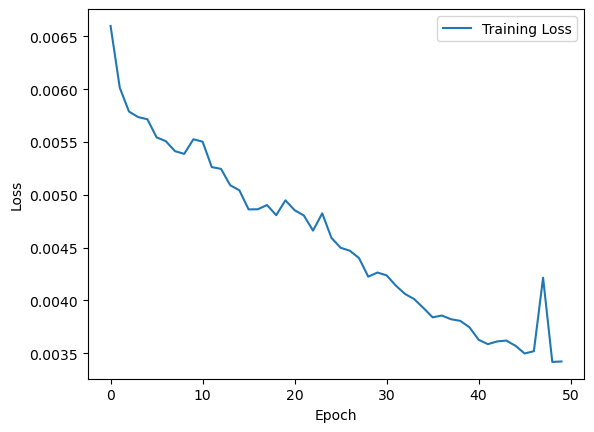

In [21]:
history = autoencoder.fit(unlabeled_x_train, unlabeled_x_train, epochs=50, batch_size=8, verbose=1) # validation_split=0.15, shuffle=True
plot_history(history, loss=True, validation=False)

In [23]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Bi-LSTM1 (Bidirectional)        │ (None, 240, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bi-LSTM2 (Bidirectional)        │ (None, 64)             │        41,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,008 (293.00 KB)

 Trainable params: 75,008 (293.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ repeat_vector (RepeatVector)    │ (None, 240, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bi-LSTM3 (Bidirectional)        │ (None, 240, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bi-LSTM4 (Bidirectional)        │ (None, 240, 128)       │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 240, 1)         │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,009 (355.50 KB)

 Trainable params: 91,009 (355.50 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
x = autoencoder.encoder.layers[-1].output
x = layers.Dense(1, activation='sigmoid')(x)
predictive_model = keras.Model(autoencoder.encoder.layers[0].input, x)

# # Define the model input layer
# input_layer = keras.Input(shape=((240,1)))  # Replace input_shape with your input size

# # Add layers as per your model's architecture
# x = layers.Flatten()(input_layer)
# x = layers.Dense(128, activation='relu')(x)  # Example hidden layer
# x = layers.Dense(64, activation='relu')(x)  # Another hidden layer
# x = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification (sigmoid)

# # Create the model
# predictive_model = keras.Model(inputs=input_layer, outputs=x)

In [87]:
predictive_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bi-LSTM1 (Bidirectional)        │ (None, 240, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Bi-LSTM2 (Bidirectional)        │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,073 (293.25 KB)

 Trainable params: 75,073 (293.25 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Read labeled data
labeled_df = pd.read_pickle("C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s.pk1.gz")

# First split: 15% for the test set and 85% for the train/validation split
labeled_train_val_df, labeled_test_df = train_test_split(labeled_df, test_size=0.15, random_state=42)

# Second split: 15% of the original data (from the 85%) for validation
validation_ratio = 0.15 / 0.85  # Adjust to get 15% of the original dataset for validation
labeled_train_df, labeled_val_df = train_test_split(labeled_train_val_df, test_size=validation_ratio, random_state=42)

# Print dataset sizes
print("Training set size:", len(labeled_train_df))
print("Validation set size:", len(labeled_val_df))
print("Test set size:", len(labeled_test_df))
print(labeled_train_df.head(10))
print(labeled_val_df.head(10))
print(labeled_test_df.head(10))

# Extract features (X) and labels (y)
labeled_x_train = labeled_train_df.drop(columns=0).values
labeled_y_train = labeled_train_df[0].values

labeled_x_val = labeled_val_df.drop(columns=0).values
labeled_y_val = labeled_val_df[0].values

labeled_x_test = labeled_test_df.drop(columns=0).values
labeled_y_test = labeled_test_df[0].values

# Encode labels
encode_label = LabelEncoder()
encode_label.fit(labeled_y_train)

y_train = encode_label.transform(labeled_y_train)
y_val = encode_label.transform(labeled_y_val)
y_test = encode_label.transform(labeled_y_test)

# Print to confirm encoding
print("Classes:", encode_label.classes_)

Training set size: 998
Validation set size: 215
Test set size: 215
           0         1          2          3          4          5    \
n14.edf    1.0 -0.001019  -0.003989  -0.011144  -0.024367  -0.017848   
rbd9.edf  -1.0  0.000464   0.024859   0.028980   0.031372   0.023855   
rbd6.edf  -1.0 -0.722292 -19.862607 -33.358756 -41.274398 -29.175022   
rbd17.edf -1.0  0.000621   0.022906   0.025419   0.015780  -0.006709   
rbd18.edf -1.0 -0.000797  -0.005220   0.029774   0.035110  -0.011650   
rbd13.edf -1.0  0.000449  -0.058831  -0.068247  -0.026695   0.005574   
rbd13.edf -1.0  0.000742   0.058234   0.064177   0.016494  -0.026175   
rbd8.edf  -1.0 -0.001544  -0.016292   0.023226   0.043268   0.031524   
rbd14.edf -1.0  0.001104   0.003973  -0.004622  -0.040996  -0.057464   
rbd13.edf -1.0  0.001024   0.028950   0.012460   0.027456   0.035821   

                 6          7          8         9    ...        231  \
n14.edf     0.009749   0.020341   0.014201  0.008250  ...   0.004141

In [29]:
# from sklearn.model_selection import train_test_split
# # to read back
# labeled_df = pd.read_pickle("C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s.pk1.gz")

# # print(labeled_df.head(3))
# # print(len(labeled_df))

# # labeled_train_df, labeled_test_df = train_test_split(labeled_df, test_size=0.8)

# # labeled_train_df = pd.read_pickle("C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s_train.pk1.gz")
# # labeled_test_df = pd.read_pickle("C:\\Users\\Gang Ren\\Research\\capslpdb_cleaned_ECG_data_30s_test.pk1.gz")

# # # Shuffle randomly
# # labeled_train_df = labeled_train_df.sample(frac=1)
# # labeled_test_df = labeled_test_df.sample(frac=1)

# print(len(labeled_train_df))
# print(len(labeled_test_df))

# labeled_x_train = labeled_train_df.drop(columns=0).values
# labeled_y_train = labeled_train_df[0].values

# labeled_x_test = labeled_test_df.drop(columns=0).values
# labeled_y_test = labeled_test_df[0].values

# # Class for y
# encode_label = LabelEncoder()
# encode_label.fit(labeled_y_train)
# y_train = encode_label.transform(labeled_y_train)
# y_test = encode_label.transform(labeled_y_test)

1008
252


In [125]:
# reshape X so that it can pass through LSTM layer
labeled_x_train = labeled_x_train.reshape(labeled_x_train.shape[0], unlabeled_x_train.shape[1], 1)

In [127]:
print(labeled_train_df.head(10))
print(labeled_test_df.head(10))
print(labeled_x_test)
print(y_test)

           0         1          2          3          4          5    \
n14.edf    1.0 -0.001019  -0.003989  -0.011144  -0.024367  -0.017848   
rbd9.edf  -1.0  0.000464   0.024859   0.028980   0.031372   0.023855   
rbd6.edf  -1.0 -0.722292 -19.862607 -33.358756 -41.274398 -29.175022   
rbd17.edf -1.0  0.000621   0.022906   0.025419   0.015780  -0.006709   
rbd18.edf -1.0 -0.000797  -0.005220   0.029774   0.035110  -0.011650   
rbd13.edf -1.0  0.000449  -0.058831  -0.068247  -0.026695   0.005574   
rbd13.edf -1.0  0.000742   0.058234   0.064177   0.016494  -0.026175   
rbd8.edf  -1.0 -0.001544  -0.016292   0.023226   0.043268   0.031524   
rbd14.edf -1.0  0.001104   0.003973  -0.004622  -0.040996  -0.057464   
rbd13.edf -1.0  0.001024   0.028950   0.012460   0.027456   0.035821   

                 6          7          8         9    ...        231  \
n14.edf     0.009749   0.020341   0.014201  0.008250  ...   0.004141   
rbd9.edf    0.008157  -0.016000  -0.033983 -0.022933  ...   0.0

In [129]:
print(f"Shape of labeled_x_train: {labeled_x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Shape of labeled_x_train: (998, 240, 1)
Shape of y_train: (998,)


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.7716 - loss: 0.4775 - val_accuracy: 0.7628 - val_loss: 0.5103
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7211 - loss: 0.5469 - val_accuracy: 0.7488 - val_loss: 0.5333
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.7745 - loss: 0.4824 - val_accuracy: 0.7628 - val_loss: 0.4958
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.7610 - loss: 0.4764 - val_accuracy: 0.7767 - val_loss: 0.4656
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7820 - loss: 0.4397 - val_accuracy: 0.7814 - val_loss: 0.4544
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.7899 - loss: 0.4300 - val_accuracy: 0.5116 - val_loss: 0.9625
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.6845 - loss: 0.5451 - val_accuracy: 0.7907 - val_loss: 0.4321
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7891 - loss: 0.4137 - 

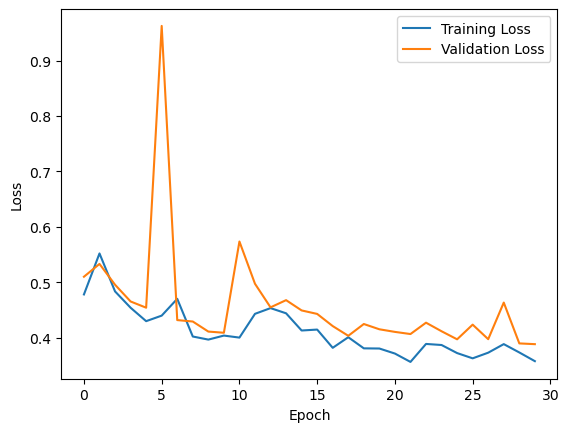

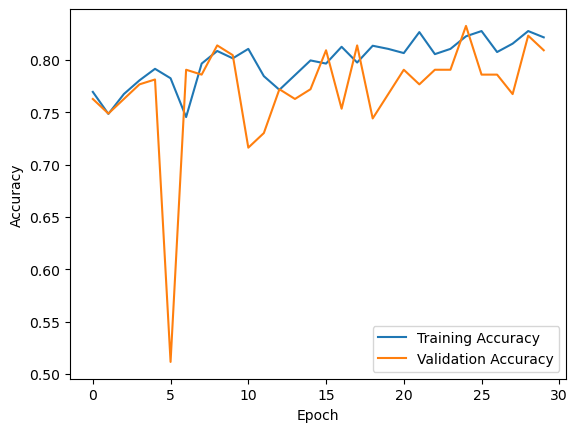

In [131]:
predictive_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
model_history = predictive_model.fit(
    labeled_x_train, 
    y_train, 
    epochs=30, 
    batch_size=8, 
    verbose=1,
    validation_data=(labeled_x_val, y_val)  # Include validation data here
)
plot_history(model_history, loss=True, validation=True)
plot_history(model_history, loss=False, validation=True)

In [133]:
predictive_model.save('semi_supervised_lstm_30epochs_70_15_15split_cfs.keras')

In [135]:
print(len(labeled_x_test))
pred_test = predictive_model.predict(labeled_x_test)
pred_test = np.where(pred_test > 0.5, 1,0).reshape(-1,)
print (pred_test)
print(f'Test Accuracy: {accuracy_score(y_test, pred_test)*100}%')
print(f'Test F1 Score: {f1_score(y_test, pred_test, average="micro")*100:.1f}%')

215
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step
[0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
Test Accuracy: 84.65116279069768%
Test F1 Score: 84.7%


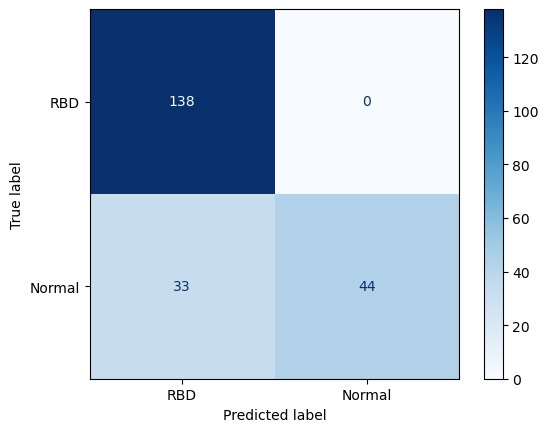

In [137]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["RBD", "Normal"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [139]:
print(classification_report(y_test, pred_test, target_names=["RBD", "Normal"]))

              precision    recall  f1-score   support

         RBD       0.81      1.00      0.89       138
      Normal       1.00      0.57      0.73        77

    accuracy                           0.85       215
   macro avg       0.90      0.79      0.81       215
weighted avg       0.88      0.85      0.83       215



In [96]:
# path = 'C:\\Users\\Gang Ren\\Research\\shhs\\polysomnography\\edfs\\shhs1\\shhs1-200001.edf'
# signals, signal_header c  , header = highlevel.read_edf(path, ch_names="ECG")

In [ ]:
# print(signal_headers[0]['sample_frequency'])

[-0.00418816 -0.00392342 -0.00366312 ...  0.06456785  0.0380972
  0.00429484]


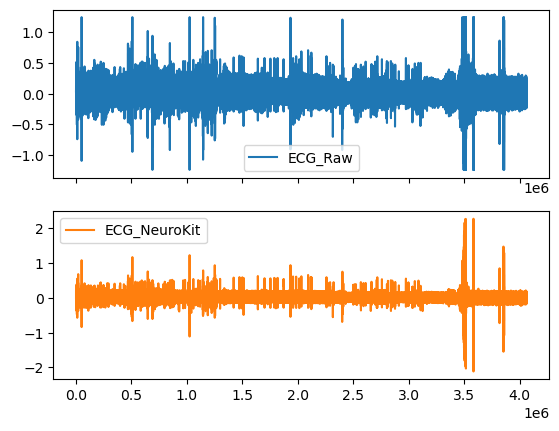

In [97]:
# # Preprocess ECG signal
# cleaned = nk.ecg_clean(signals[0], sampling_rate=signal_headers[0]['sample_frequency'], method="neurokit")

# dataframe = pd.DataFrame({
#     "ECG_Raw" : signals[0],
#     "ECG_NeuroKit" : cleaned
# })

# # print(cleaned)
# # dataframe.plot(subplots=True)

# dataframe.to_csv("test.csv")